# Graffiti Analysis

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
sns.set(color_codes=True)

In [174]:
graffiti = pd.read_csv("311_Service_Requests_-_Graffiti_Removal.csv")

In [175]:
graffiti.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2016,Completed,01/04/2016,16-00001120,Graffiti Removal,Brick - Unpainted,Front,4002 W BELDEN AVE,60639.0,1.149326e+06,1.914986e+06,35.0,25.0,20.0,NaN,41.922754,-87.726920,"(41.92275371369149, -87.72691963120627)"
1,01/01/2016,Completed,01/04/2016,16-00001753,Graffiti Removal,Brick - Unpainted,Alley,3324 W SCHUBERT AVE,60647.0,1.153530e+06,1.917756e+06,35.0,14.0,22.0,NaN,41.930270,-87.711830,"(41.93027022573564, -87.7118303754877)"
2,01/01/2016,Completed,01/04/2016,16-00002928,Graffiti Removal,Brick - Unpainted,Side,3700 S ARCHER AVE,60632.0,1.161132e+06,1.879956e+06,12.0,9.0,59.0,NaN,41.826349,-87.684472,"(41.82634906722627, -87.68447240074919)"
3,01/01/2016,Completed,01/04/2016,16-00003519,Graffiti Removal,Metal - Painted,Front,1503 W MORSE AVE,60626.0,1.165094e+06,1.946162e+06,49.0,24.0,1.0,24.0,42.007761,-87.668046,"(42.00776133839233, -87.66804558302428)"
4,01/01/2016,Completed,01/04/2016,16-00003521,Graffiti Removal,Metal - Painted,Front,1447 W MORSE AVE,60626.0,1.165368e+06,1.946171e+06,49.0,24.0,1.0,24.0,42.007765,-87.667774,"(42.00776549837537, -87.66777445467486)"


In [176]:
graffiti["Type of Service Request"].value_counts()

Graffiti Removal    120461
Name: Type of Service Request, dtype: int64

In [177]:
graffiti.shape

(120461, 18)

In [178]:
sum(pd.isnull(graffiti["SSA"]))

87550

In [179]:
87550/120461

0.7267912436390201

We can see that the 'type of service request' is identical for the entire dataframe. As such, we will drop the service request number column as it doesnt tell us anything interesting. We will also drop the street address column as our anaysis will be focused on Zip Codes. Since we will not be perfoming any form of geociding, I will also drop the columns correspinding the the X and Y co-ordinates as well as the latiude and the longitude and the location.

From the above we can see that around 73% of data is not reported in the SSA column - thus the SSA column will also be dropped.

I am also dropping the service request number as these are just a form of ID number and dont tell us anything interesting.

In [180]:
graffiti.drop('Service Request Number', axis=1, inplace=True)
graffiti.drop("Street Address", axis=1, inplace=True)
graffiti.drop("X Coordinate", axis=1, inplace=True)
graffiti.drop("Y Coordinate", axis=1, inplace=True)
graffiti.drop("Latitude", axis=1, inplace=True)
graffiti.drop("Longitude", axis=1, inplace=True)
graffiti.drop("SSA", axis=1, inplace=True)
graffiti.drop("Location", axis=1, inplace=True)

In [181]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0


In [182]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)
#obtained from stack overflow

In [183]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0


In [184]:
a = list(graffiti['Creation Date'])
b = list(graffiti["Completion Date"])

combined = list(zip(a,b))

In [185]:
days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)
# we are ensuring is is of type str as we have some nan which are of type float.

In [186]:
len(days_list)

120461

In [187]:
graffiti.shape

(120461, 10)

In [188]:
sum(pd.isnull(graffiti["Completion Date"]))

0

All graffiti requests within the alst year have been completed. Seems like Chicago has a good handle on dealing with graffiti!

In [189]:
df_days = pd.DataFrame({"Response Time (Days)": days_list})
graffiti = pd.concat([graffiti,df_days], axis=1)

In [190]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area,Response Time (Days)
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0,3
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0,3
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0,3
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3


In [191]:
month_list = []

for i in graffiti["Creation Date"]:
    clean = datetime.strptime(i, "%m/%d/%Y")
    month_list.append(clean.month)

df_months = pd.DataFrame({"Month": month_list})
graffiti = pd.concat([graffiti,df_months], axis=1)

In [192]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0,3,1
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0,3,1
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0,3,1
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1


In [193]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()

,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
0.0,42.0,0.309524,1.115043,0.0,0.0,0.0,0.0,7.0
60601.0,645.0,0.773643,1.122160,0.0,0.0,0.0,1.0,5.0
60602.0,133.0,0.571429,0.955730,0.0,0.0,0.0,1.0,5.0
60603.0,110.0,0.472727,0.864266,0.0,0.0,0.0,1.0,4.0
60604.0,76.0,0.381579,0.848011,0.0,0.0,0.0,0.0,5.0
60605.0,734.0,0.717984,1.168377,0.0,0.0,0.0,1.0,8.0
60606.0,337.0,0.575668,0.976389,0.0,0.0,0.0,1.0,6.0
60607.0,1009.0,0.596630,1.074058,0.0,0.0,0.0,1.0,10.0
60608.0,8537.0,0.544922,0.927366,0.0,0.0,0.0,1.0,7.0


In [194]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmax()

60649.0

In [195]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].max()

1.1511627906976745

In [196]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmin()

60666.0

In [197]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].min()

0.0

Here we can see that the Zip code 60649 had the highest mean response days at around 1 Day. The area corresponding to the Zip Code 60666 had the smallest mean response time of around 0 days - this can be interpreted as same day service.

In [198]:
g = geocoder.google("60666")
g2 = geocoder.google(g.latlng, method='reverse')
g2.address

"Chicago O'hare International Rd, Chicago, IL 60666, USA"

We can see here that the Zip Code corresponding to same day service is actually Chicago O'Hare International Airport. Makes sense that the city woud want to ensure that this location is always looking good!

In [199]:
g3 = geocoder.google("60649")
g4 = geocoder.google(g3.latlng, method='reverse')
g4.address

'2451 E 74th Pl, Chicago, IL 60649, USA'

In [200]:
g4.neighborhood

'South Side'

The 60649 zip code corresponds to the south shore and Jackson Park in the South Side of Chicago.

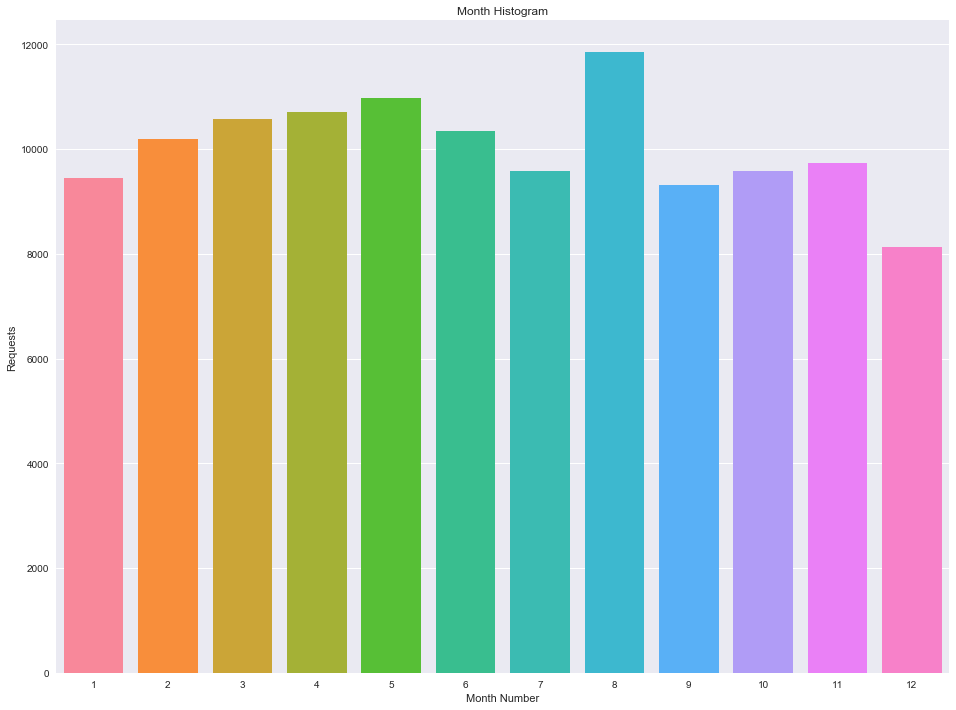

In [201]:
hist_month = graffiti["Month"].value_counts(sort=False)
plt.figure(figsize=(16,12))
g=sns.countplot(x="Month", saturation=1, data=graffiti, order=hist_month.index)
plt.title("Month Histogram")
plt.xlabel("Month Number")
plt.ylabel("Requests")
plt.show()

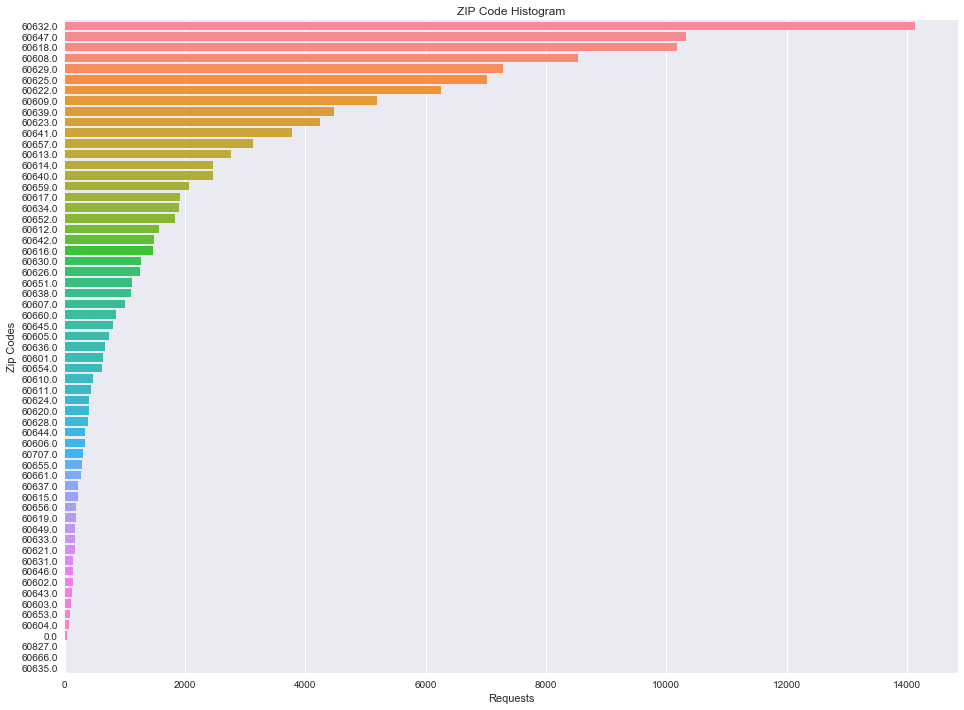

In [202]:
hist_graffiti = graffiti["ZIP Code"].value_counts()

plt.figure(figsize=(16,12))
g=sns.countplot(y='ZIP Code', saturation=1, data=graffiti, order=hist_graffiti.index)
plt.title("ZIP Code Histogram")
plt.xlabel("Requests")
plt.ylabel("Zip Codes")
plt.show()

In [203]:
hist_location = graffiti["Where is the Graffiti located?"].value_counts()

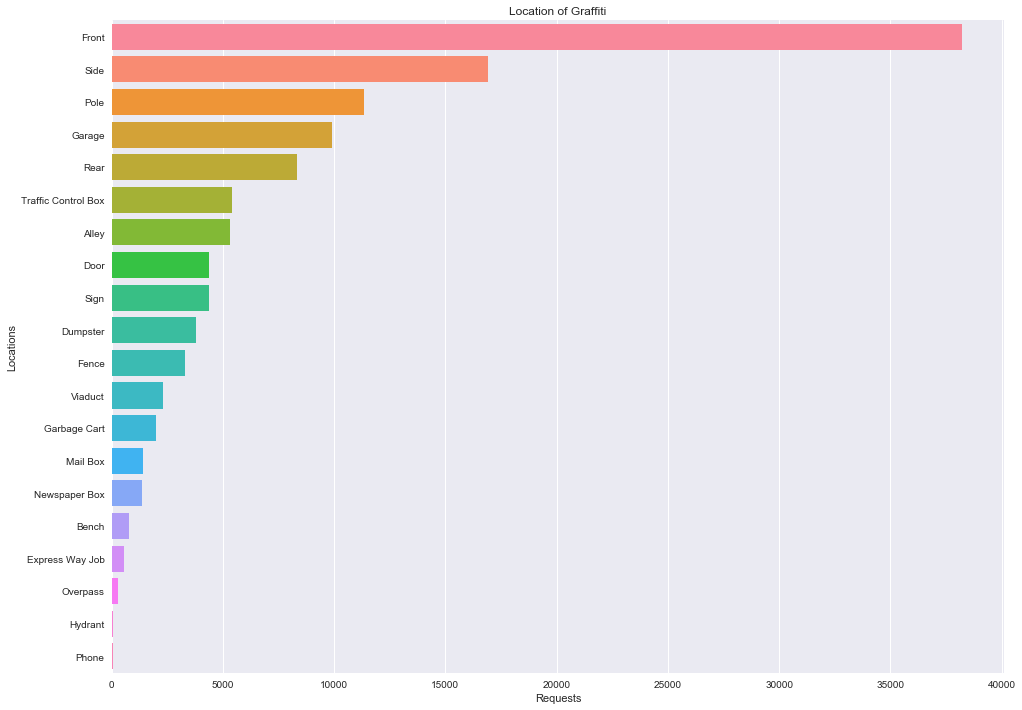

In [204]:
plt.figure(figsize=(16,12))
g=sns.countplot(y='Where is the Graffiti located?', saturation=1, data=graffiti, order=hist_location.index)
plt.title("Location of Graffiti")
plt.xlabel("Requests")
plt.ylabel("Locations")
plt.show()

In [205]:
graffiti['Response Time (Days)'].groupby([graffiti["ZIP Code"], graffiti['Where is the Graffiti located?']]).describe().unstack()

count      mean       std  min   25%  \
ZIP Code Where is the Graffiti located?                                         
0.0      Alley                             1.0  0.000000       NaN  0.0  0.00   
         Express Way Job                   3.0  1.000000  0.000000  1.0  1.00   
         Fence                             2.0  0.000000  0.000000  0.0  0.00   
         Front                            15.0  0.533333  1.807392  0.0  0.00   
         Garbage Cart                      1.0  0.000000       NaN  0.0  0.00   
         Pole                             10.0  0.000000  0.000000  0.0  0.00   
         Rear                              2.0  1.000000  0.000000  1.0  1.00   
         Side                              2.0  0.000000  0.000000  0.0  0.00   
         Sign                              2.0  0.000000  0.000000  0.0  0.00   
         Traffic Control Box               2.0  0.000000  0.000000  0.0  0.00   
60601.0  Alley                            11.0  1.090909  1.136182  0.0  0.00   
         Bench                             7.0  0.285714  0.755929  0.0  0.00   
         Door                             26.0  0.500000  0.948683  0.0  0.00   
         Dumpster                          7.0  0.000000  0.000000  0.0  0.00   
         Express Way Job                  11.0  1.818182  0.873863  0.0  1.50   
         Fence                            23.0  1.391304  1.157550  0.0  1.00   
         Front                           268.0  0.589552  1.089361  0.0  0.00   
         Garage                            1.0  1.000000       NaN  1.0  1.00   
         Garbage Cart                      2.0  0.000000  0.000000  0.0  0.00   
         Mail Box                          2.0  2.500000  2.121320  1.0  1.75   
         Newspaper Box                     1.0  0.000000       NaN  0.0  0.00   
         Overpass                         32.0  0.281250  0.634206  0.0  0.00   
         Pole                             84.0  0.940476  1.165273  0.0  0.00   
         Rear                              8.0  0.750000  0.886405  0.0  0.00   
         Side                             77.0  1.532468  1.107206  0.0  1.00   
         Sign                             13.0  0.846154  1.068188  0.0  0.00   
         Traffic Control Box              66.0  0.363636  0.834568  0.0  0.00   
         Viaduct                           6.0  1.500000  1.760682  0.0  1.00   
60602.0  Alley                             8.0  1.000000  1.309307  0.0  0.00   
         Bench                             1.0  0.000000       NaN  0.0  0.00   
...                                        ...       ...       ...  ...   ...   
60661.0  Side                             45.0  0.644444  1.090362  0.0  0.00   
         Sign                              2.0  1.000000  0.000000  1.0  1.00   
         Traffic Control Box              46.0  0.739130  1.042109  0.0  0.00   
         Viaduct                           1.0  0.000000       NaN  0.0  0.00   
60666.0  Front                             7.0  0.000000  0.000000  0.0  0.00   
         Garage                            1.0  0.000000       NaN  0.0  0.00   
         Traffic Control Box               1.0  0.000000       NaN  0.0  0.00   
60707.0  Alley                             7.0  1.000000  0.577350  0.0  1.00   
         Bench                             4.0  0.500000  1.000000  0.0  0.00   
         Door                             10.0  0.300000  0.674949  0.0  0.00   
         Dumpster                          3.0  0.000000  0.000000  0.0  0.00   
         Fence                             6.0  0.666667  0.816497  0.0  0.00   
         Front                           100.0  0.210000  0.555869  0.0  0.00   
         Garage                           28.0  0.928571  0.766356  0.0  0.00   
         Garbage Cart                      5.0  0.400000  0.894427  0.0  0.00   
         Mail Box                          2.0  0.500000  0.707107  0.0  0.25   
         Newspaper Box                     6.0  0.000000  0.000000  0.0 

In [206]:
graffiti['Response Time (Days)'].groupby([graffiti["Where is the Graffiti located?"], graffiti['What Type of Surface is the Graffiti on?']]).describe().unstack()

count  \
Where is the Graffiti located? What Type of Surface is the Graffiti on?           
Alley                          Aluminum Siding                            286.0   
                               Asphalt                                     26.0   
                               Brick - Painted                           1067.0   
                               Brick - Unpainted                         1433.0   
                               Cement (Sidewalk, Alley, Wall, Curb)       411.0   
                               Glass                                       13.0   
                               Limestone                                   14.0   
                               Marble/Granite                               6.0   
                               Metal - Painted                           1043.0   
                               Metal - Unpainted                          132.0   
                               Other / Unknown Surface                     64.0   
                               Other/Unknown Surface                      207.0   
                               Stucco                                      16.0   
                               Tree                                         1.0   
                               Vinyl Siding                               218.0   
                               Wood - Painted                             242.0   
                               Wood - Unpainted                           146.0   
Bench                          Asphalt                                      4.0   
                               Brick - Painted                              6.0   
                               Brick - Unpainted                           12.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        56.0   
                               Glass                                        6.0   
                               Limestone                                    3.0   
                               Metal - Painted                            144.0   
                               Metal - Unpainted                           52.0   
                               Other / Unknown Surface                      4.0   
                               Other/Unknown Surface                       29.0   
                               Tree                                         1.0   
                               Vinyl Siding                                 3.0   
                               Wood - Painted                             370.0   
...                                                                         ...   
Sign                           Other / Unknown Surface                     28.0   
                               Other/Unknown Surface                      239.0   
                               Vinyl Siding                                 8.0   
                               Wood - Painted                             106.0   
                               Wood - Unpainted                            23.0   
Traffic Control Box            Aluminum Siding                              6.0   
                               Brick - Painted                             14.0   
                               Brick - Unpainted                            6.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        14.0   
                               Limestone                                    1.0   
                               Marble/Granite                               1.0   
                               Metal - Painted                           5213.0   
                               Metal - Unpainted                          133.0   
                               Other / Unknown Surface                      2.0   
                               Other/Unknown Surface                        9.0   
                               Tree                                         2.0   
       

In [207]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()

count      mean       std  min  25%  50%   75%  \
Police District ZIP Code                                                    
0.0             0.0         19.0  0.473684  1.611363  0.0  0.0  0.0  0.00   
                60631.0      4.0  0.000000  0.000000  0.0  0.0  0.0  0.00   
                60645.0      1.0  2.000000       NaN  2.0  2.0  2.0  2.00   
1.0             60601.0    626.0  0.752396  1.119015  0.0  0.0  0.0  1.00   
                60602.0    133.0  0.571429  0.955730  0.0  0.0  0.0  1.00   
                60603.0    110.0  0.472727  0.864266  0.0  0.0  0.0  1.00   
                60604.0     76.0  0.381579  0.848011  0.0  0.0  0.0  0.00   
                60605.0    734.0  0.717984  1.168377  0.0  0.0  0.0  1.00   
                60606.0    322.0  0.580745  0.986514  0.0  0.0  0.0  1.00   
                60607.0    202.0  0.648515  1.233941  0.0  0.0  0.0  1.00   
                60610.0      1.0  2.000000       NaN  2.0  2.0  2.0  2.00   
                60616.0    222.0  0.513514  0.991957  0.0  0.0  0.0  1.00   
                60654.0      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
                60661.0    112.0  0.848214  1.075609  0.0  0.0  1.0  1.00   
2.0             60609.0     36.0  0.166667  0.447214  0.0  0.0  0.0  0.00   
                60615.0    225.0  0.804444  1.152241  0.0  0.0  0.0  1.00   
                60616.0     18.0  0.333333  0.594089  0.0  0.0  0.0  0.75   
                60621.0     15.0  0.533333  0.915475  0.0  0.0  0.0  1.00   
                60637.0     76.0  0.618421  1.095045  0.0  0.0  0.0  1.00   
                60653.0     93.0  0.784946  1.196457  0.0  0.0  0.0  1.00   
3.0             60619.0     38.0  0.921053  1.099916  0.0  0.0  1.0  1.00   
                60621.0     17.0  1.176471  1.975958  0.0  0.0  0.0  1.00   
                60637.0    152.0  0.894737  1.196894  0.0  0.0  0.5  1.00   
                60649.0    112.0  0.883929  1.063273  0.0  0.0  1.0  1.00   
4.0             60617.0   1917.0  0.488263  0.945538  0.0  0.0  0.0  1.00   
                60619.0     72.0  0.791667  1.266441  0.0  0.0  0.0  1.00   
                60633.0    169.0  0.538462  1.040833  0.0  0.0  0.0  1.00   
                60649.0     60.0  1.650000  1.866974  0.0  0.0  1.0  3.00   
5.0             60628.0    314.0  0.490446  1.033730  0.0  0.0  0.0  1.00   
                60633.0      1.0  0.000000       NaN  0.0  0.0  0.0  0.00   
...                          ...       ...       ...  ...  ...  ...   ...   
18.0            60654.0    534.0  0.599251  0.900531  0.0  0.0  0.0  1.00   
19.0            60613.0   2757.0  0.497280  0.942704  0.0  0.0  0.0  1.00   
                60614.0   1188.0  0.583333  0.960356  0.0  0.0  0.0  1.00   
                60618.0   2357.0  0.829868  1.063912  0.0  0.0  1.0  1.00   
                60625.0   1545.0  0.690615  1.018009  0.0  0.0  0.0  1.00   
                60640.0   1170.0  0.608547  1.040133  0.0  0.0  0.0  1.00   
                60647.0     33.0  0.727273  1.179850  0.0  0.0  0.0  1.00   
                60657.0   3138.0  0.566922  1.004048  0.0  0.0  0.0  1.00   
20.0            60625.0   1686.0  0.716489  0.966035  0.0  0.0  0.0  1.00   
                60640.0   1292.0  0.497678  0.897105  0.0  0.0  0.0  1.00   
                60659.0    562.0  0.663701  0.926381  0.0  0.0  0.0  1.00   
                60660.0    419.0  0.825776  1.214231  0.0  0.0  0.0  1.00   
22.0            60620.0     50.0  0.620000  1.307592  0.0  0.0  0.0  0.00   
                60628.0     67.0  0.358209  0.732399  0.0  0.0  0.0  0.50   
                60643.0    113.0  0.504425  1.053259  0.0  0.0  0.0  1.00   
                60655.0    289.0  0.155709  0.676985  0.0  0.0  0.0  0.00   
24.0            60626.0   1247.0  0.651163  1.031314  0.0  0.0  0.0  1.00   
                60645.0    801.0  0.811486  1.010281  0.0  0.0  1.0  1.00   
                60659.0   1177.0  0.708581  1.023135  0.0  0.0  0.0  1.00   
                60660.0

In [208]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()['mean'].idxmax()

(0.0, 60645.0)

In [209]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()['mean'].max()

2.0

From the above we can see that the Zip Code 60645, in the 0th Police District had the highest mean response time of 2 days.

It seems a bit odd to have a 0th Police District, so this is most likely a data entry error.

In [210]:
hist_police = graffiti["Police District"].value_counts(sort=True)

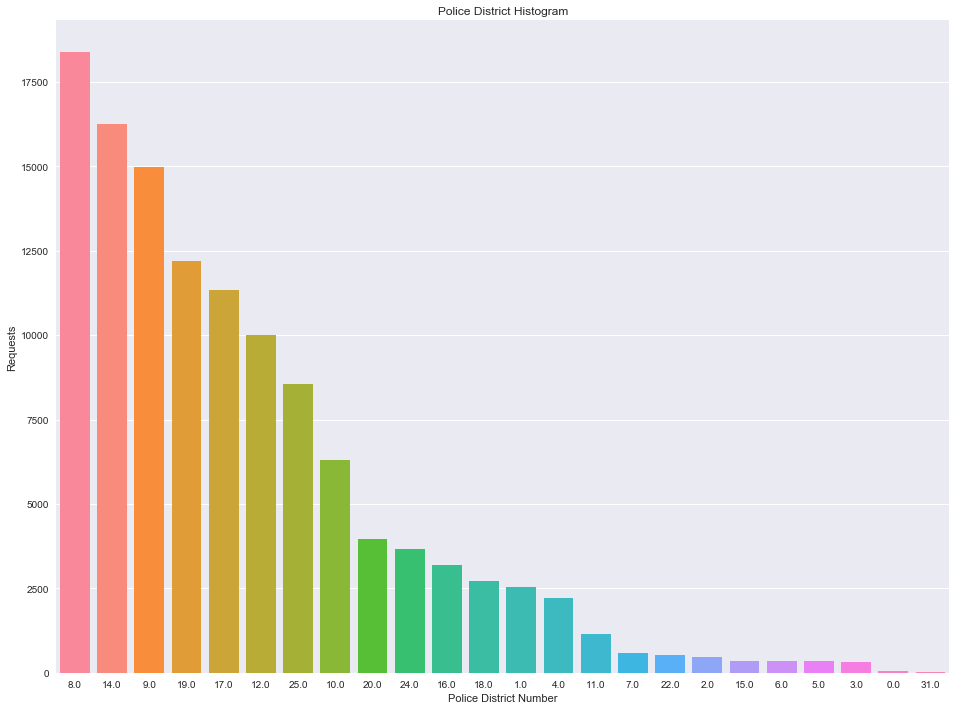

In [211]:
plt.figure(figsize=(16,12))
g=sns.countplot(x='Police District', saturation=1, data=graffiti, order=hist_police.index)
plt.title("Police District Histogram")
plt.xlabel("Police District Number")
plt.ylabel("Requests")
plt.show()

# Vacant and Abandoned Buildings Analysis

In [212]:
buildings = pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")

In [213]:
buildings.head()

,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,Vacant/Abandoned Building,16-00017936,01/02/2016,Front,NaN,Open,FRONT-SIDE AND REAR,Vacant,False,True,...,ST,60621.0,1.170327e+06,1.865488e+06,16.0,7.0,68.0,41.786386,-87.651033,"(41.78638640364335, -87.65103294840148)"
1,Vacant/Abandoned Building,16-00027497,01/03/2016,Front,NaN,Open,NaN,Vacant,False,False,...,ST,60629.0,1.153522e+06,1.862608e+06,23.0,8.0,66.0,41.778832,-87.712726,"(41.778832091928, -87.7127256067861)"
2,Vacant/Abandoned Building,16-00035418,01/03/2016,Front,NaN,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,...,ST,60636.0,1.167017e+06,1.865600e+06,16.0,7.0,67.0,41.786764,-87.663167,"(41.786764299374006, -87.66316688619024)"
3,Vacant/Abandoned Building,16-00031311,01/03/2016,Front,NaN,Open,FRONT ENTRY,Vacant,False,False,...,AVE,60620.0,1.173188e+06,1.849430e+06,21.0,6.0,71.0,41.742258,-87.641018,"(41.74225776568885, -87.64101798247111)"
4,Vacant/Abandoned Building,16-00035051,01/03/2016,Rear,NaN,Open,REAR,Vacant,False,False,...,ST,60620.0,1.170063e+06,1.851007e+06,21.0,6.0,71.0,41.746654,-87.652421,"(41.74665406968148, -87.65242142853317)"


In [214]:
buildings.shape

(4472, 23)

In [215]:
buildings.columns

Index(['SERVICE REQUEST TYPE', 'SERVICE REQUEST NUMBER',
       'DATE SERVICE REQUEST WAS RECEIVED',
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)',
       'ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION',
       'ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX', 'ZIP CODE',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'Location'],
      dtype='object')

In [216]:
buildings["ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)"].value_counts()

False    2343
True     1525
Name: ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS), dtype: int64

In [217]:
buildings["LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD)."].unique()

array(['Front', 'Rear', nan, 'Garage'], dtype=object)